<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

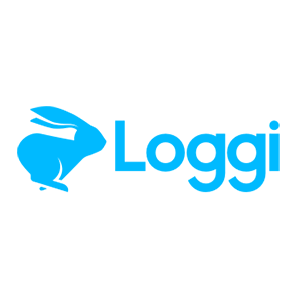

A Loggi é uma empresa que funciona como intermédio entre entregadores e pessoas que precisam efetuar ou receber entregas. O serviço se consolidou como uma das principais alternativas no transporte de mercadorias. Além de um site web, a Loggi também conta com um aplicativo para Android ou iOS, é um serviço de logística para facilitar entregas feitas tanto para pessoas físicas quanto jurídicas.

Além de centros de distribuição e agências próprias espalhados pelo Brasil, atualmente a Loggi possui mais de 40 mil entregadores cadastrados e que atendem em mais de 540 municípios em todas as regiões do país.

É muito importante destacar que a Loggi não é uma transportadora ou empresa de motofrete, mas sim a companhia que organiza a entrega entre o cliente e o mensageiro. Por isso, as entregas não são feitas pela própria Loggi, mas sim por uma rede de entregadores parceiros que fazem parte da logística da empresa.

A **Loggi** como toda empresa do setor logístico faz entregas em todo o Brasil, sendo que essas entregas possuem uma capacidade máxima em seus veículos, pontos de entregas e de distribuição.

Neste notebook, será realizada uma **Análise Exploratória de Dados (EDA)**, com o intuito de conhecer os hubs distribuídos no **Distrito Federal** **(DF)**, bem como a proporção e os desafios que a Loggi enfrenta diante de todo esse cenário logístico de entregas. E, principalmente, exploraremos esses dados para visualizarmos e entendermos o quão é complexo e importante para a Loggi analisar essas informações com a finalidade de garantir uma melhor performance em seus serviços.


## 2\. Pacotes e bibliotecas

In [1]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
# - 1º pacotes nativos do python: json, os, etc.;
# - 2º pacotes de terceiros: pandas, seabornm etc.;
# - 3º pacotes que você desenvolveu.

!pip install geopandas


In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

## 3\. Exploração de dados

## **3.1. Coleta**

Vamos realizar o seu download num arquivo `JSON` com o nome `deliveries.json`.

In [3]:
# faça o código de exploração de dados:
# - coleta de dados;

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

Vamos carregar os dados do arquivo em um dicionário Python chamado `data`:

In [4]:
with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)


In [5]:
# Formato do dado coletado:
type(data)

list

In [6]:
# Quantidade de itens da lista
len(data)

199

## **3.2. Wrangling**

In [7]:
# - wrangling da estrutura;

deliveries_df = pd.DataFrame (data)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [8]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              199 non-null    object
 1   region            199 non-null    object
 2   origin            199 non-null    object
 3   vehicle_capacity  199 non-null    int64 
 4   deliveries        199 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


As colunas origin e deliveries possuem dados em formato de dicionário e lista, sendo assim, serão necessários alguns métodos da biblioteca pandas para descompactar essas informações.

👉 Será criado um segundo dataframe utilizando o método .json_normalize.

Também, utilizaremos a operação conhecida como flatten, que transforma cada chave do JSON em uma nova coluna, separando as informações que estão alinhadas como dicionário mantendo o index original.

 - **Coluna**: origin

Vamos normalizar a coluna com a operação conhecida como flatten ou achatamento que transforma cada chave do JSON em uma nova coluna:

In [9]:
hub_origin_df = pd.json_normalize(deliveries_df["origin"])
hub_origin_df.head()


,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


Após a separação dos dados em colunas é possível juntar os dois dataframes com o método merge utilizando o index das linhas que foi mantido como chave para uní-los.

In [10]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)

In [11]:
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


Com os dados unidos em um só dataframe, e as novas colunas de lng e lat, vamos remover a coluna origin contendo os dados no dicionário alinhado e reordenar as colunas.

In [12]:
deliveries_df = deliveries_df.drop("origin", axis=1)
deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


Visto que em deliveries também existem informações referentes à latitude e longitude do ponto de entrega, vamos renomear as colunas recém criadas para especificar que se referem ao hub de origem:

In [13]:
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


 - **Coluna**: deliveries

Vamos fazer o tratamento da coluna deliveries, onde cada linha contém uma lista de JSON que corresponde ao formato de um dicionário python

👉 A partir da coluna deliveries cria-se um novo dataframe, utilizando o método explode, que transforma cada elemento da lista em uma nova linha do dataframe.

Verifica-se que o dataframe criado possui 636149 linhas, e elas mantém o index da linha do dataframe de origem.

In [14]:
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")
print(len(deliveries_exploded_df))

636149


In [15]:
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [16]:
deliveries_exploded_df.tail()

,deliveries
198,"{'id': '21693bf442ac5890adbdf2648c12881a', 'po..."
198,"{'id': '7aaa35088b37b6e542c4cd69663a7ebf', 'po..."
198,"{'id': '60c00d5390da4f28167439cd9c566703', 'po..."
198,"{'id': '51f456963785e7381243ff7baf7efd06', 'po..."
198,"{'id': 'b7078c815198669e2aab4336e94c0bb8', 'po..."


👉 Cada linha (dicionário/json) do dataframe dá origem a 3 novos dataframes, onde cada um representa uma informação de interesse contida ali dentro.

Agora cada linha será primeiramente transformada em um dataframe com o método apply sobre a coluna, selecionando as informações através da chave do dicionário das informações referentes à latitude, longitude e tamanho da carga (o id não será utilizado).

In [17]:
deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
deliveries_normalized_df.head()

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


👉 Os dados assim dispostos podem ser combinados com o dataframe inicial utilizando merge

Primeiro removemos a coluna deliveries visto que o novo dataframe deliveries_normalized_df foi criado a partir dos dados dela, e após isso as informações são mescladas utilizando o index das linhas.

In [18]:
deliveries_df = deliveries_df.drop("deliveries", axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


## **3.3. Estrutura**

In [19]:
# Número de linhas e colunas
deliveries_df.shape

(636149, 8)

In [20]:
# Nome das colunas
deliveries_df.columns

Index(['name', 'region', 'hub_lng', 'hub_lat', 'vehicle_capacity',
       'delivery_size', 'delivery_lng', 'delivery_lat'],
      dtype='object')

In [21]:
# Índex dos registros (linhas)
deliveries_df.index

RangeIndex(start=0, stop=636149, step=1)

In [22]:
# Nome das colunas, número de registros e tipos de dados
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


## **3.4. Schema**

In [23]:
# - exploração do schema;
deliveries_df.head(n=5)

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


 - Colunas e seus respectivos tipos de dados.

In [24]:
deliveries_df.dtypes

name                 object
region               object
hub_lng             float64
hub_lat             float64
vehicle_capacity      int64
delivery_size         int64
delivery_lng        float64
delivery_lat        float64
dtype: object

 - Atributos **categóricos**.

In [25]:
# Sumário dos dados categóricos
deliveries_df.select_dtypes("object").describe().T

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


 - Atributos **numéricos**.

In [26]:
# Sumário dos dados numéricos
deliveries_df.select_dtypes('int64').describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


## **3.5. Dados faltantes**

Dados faltantes podem ser strings vazias (`""`), dados nulos (`None`), não disponíveis ou aplicáveis( `na`, `NA`, etc) e não numéricos (`nan`, `NaN`, etc). Podemos verificar quais colunas possuem dados faltantes utilizando `.isna()` e `.any()`

In [27]:
deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
dtype: bool

## 4\. Manipulação

### **4.1 Enriquecimento**

#### **4.1.1 Geocodificação reversa do hub**

A **geocodificação** é o processo que transforma uma localização descrita por um texto (endereço, nome do local, etc.) em sua respectiva coodernada geográfica (latitude e longitude). A **geocodificação reversa** faz o oposto, transforma uma coordenada geográfica de um local em suas respectivas descrições textuais.

In [28]:
# faça o código de manipulação de dados:
# - enriquecimento;

# Criando um dataframe somente com as colunas de região, longitude e latitude
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]]
hub_df = hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)

In [29]:
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


Utilizaremos o projeto open source OpenStreetMap que mantém um serviço gratuito de geocodificação chamado Nominatim através do pacote Python geopy para fazer a operação reversa e enriquecer o nosso DataFrame principal com dados referentes ao endereço dos hubs.

A seguir uma amostra do JSON resultante da consulta utilizando a latitude -15.657013854445248 e a longitude -47.802664728268745.

In [30]:
import json

import geopy
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ebac_geocoder")
location = geolocator.reverse("-15.657013854445248, -47.802664728268745")

print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 46410411,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656916027876347",
  "lon": "-47.80264463632131",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.10000999999999993,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-202, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "stat

Como existem limitações do serviço gratuito do Nominatim, utilizaremos os *imports* abaixo, que garantem que a consulta seja feita com o *step* de 1 s:

In [31]:
from geopy.extra.rate_limiter import RateLimiter

geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [32]:
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]]
hub_df= hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


Precisamos ainda, criar uma coluna com o mesmo padrão do Nominatim:

```
<"latitude, longitude">
```

In [33]:
# Cria uma coluna para as coordenadas seguindo o padrão do geolocator (lat, lng)
hub_df["coordinates"] = hub_df["hub_lat"].astype(str)  + ", " + hub_df["hub_lng"].astype(str)
hub_df.head()

,region,hub_lng,hub_lat,coordinates
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745"
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872"
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707"


In [34]:
# Cria uma coluna com os dados obtidos da consulta, aplicando o geocoder na coluna das coordenadas
hub_df["geodata"] = hub_df["coordinates"].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


Criamos outro DataFrame que separa cada linha (que representa o JSON da consulta) em colunas separadas, e a seguir, selecionamos os dados de interesse contidos nas colunas `address.town`, `address.city` e `address.hub`.

In [35]:
# Normalize permite quebrar as informações de geodata em colunas separadas de acordo com as chaves do json
hub_geodata_df = pd.json_normalize(hub_df["geodata"].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.00001,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [36]:
hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]
hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)
hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
hub_geodata_df["hub_suburb"] = np.where(hub_geodata_df["hub_suburb"].notna(), hub_geodata_df["hub_suburb"], hub_geodata_df["hub_city"])
hub_geodata_df = hub_geodata_df.drop("hub_town", axis=1)
hub_geodata_df.head()

<ipython-input-36-e7ffd1c368d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)
<ipython-input-36-e7ffd1c368d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
<ipython-input-36-e7ffd1c368d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


O DataFrame `hub_geodata_df` com as informações de **cidade** e **bairro** é então combinado ao DataFrame principal `deliveries_df`, enriquecendo assim o dado.

In [37]:
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[["region", "hub_suburb", "hub_city"]]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


Agora é possível combinar nosso DataFrame original com os dados obtidos da geolocalização reversa, inserindo duas novas colunas: `hub_city` e `hub_suburb`

In [38]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how="inner", on="region")
deliveries_df = deliveries_df[["name", "region", "hub_lng", "hub_lat", "hub_city", "hub_suburb", "vehicle_capacity", "delivery_size", "delivery_lng", "delivery_lat"]]
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


#### 4.1.2 **Geocodificação reversa da entrega**

Enquanto o **hub** contem apenas **3** geolocalizações distintas, as **entregas** somam o total de **636.149**, o que levaria em torno de 7 dias para serem consultadas no servidor do Nominatim, dada a restrição de uma consulta por segundo. Contudo, para cargas pesadas como esta, o software oferece uma instalação [local](https://nominatim.org/release-docs/latest/admin/Installation/) (na sua própria máquina) que pode ser utilizada sem restrição.

> **Atenção:** Como a instalação do servidor local envolve tecnologias que estão fora do escopo deste curso (como [Docker](https://www.docker.com/)), eu vou providenciar estes dados para você através deste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv).

In [39]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

In [40]:
deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")
deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [41]:
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]], how="inner", left_index=True, right_index=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


#### 4.1.3 Cálculo da distância

Utilizando o pacote h3, realizaremos o cálculo da distância entre os hubs e seus locais de entrega.

In [42]:
!pip install h3

import h3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00


In [43]:
deliveries_df['distance'] = deliveries_df.apply(lambda row: h3.point_dist((row['hub_lat'], row['hub_lng']), (row['delivery_lat'], row['delivery_lng']), unit='km'), axis=1)

In [44]:
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,distance
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,6.655514
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,6.905409
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,6.244587
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,6.806060
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,6.780017


### **4.2 Qualidade**

Com o enriquecimento dos dados e a criação de novas colunas, uma nova verificação da sua estrutura deve ser realizada, com os mesmos métodos aplicados em 3.3, 3.4 e 3.5

In [45]:
# - controle de qualidade;

deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636149 entries, 0 to 636148
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
 12  distance          636149 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 84.1+ MB


In [46]:
deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
hub_city            False
hub_suburb          False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
distance            False
dtype: bool

- **Geocodificação reversa**

In [47]:
# Proporção de valores nulos na coluna delivery_city
100 * (deliveries_df["delivery_city"].isna().sum() / len(deliveries_df))

0.26754738276724477

In [48]:
# Proporção de valores nulos na coluna delivery_suburb
100 * (deliveries_df["delivery_suburb"].isna().sum() / len(deliveries_df))

25.133262804783158

In [49]:
# Proporção de cada registro da coluna delivery_city
prop_df = deliveries_df[["delivery_city"]].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_city       
Brasília                0.234195
Taguatinga              0.071625
Sudoeste / Octogonal    0.069504
Ceilândia               0.059661
Águas Claras            0.058293
Guará                   0.055619
Lago Sul                0.045620
Sobradinho              0.045412
Lago Norte              0.040832
Gama                    0.034880
dtype: float64

In [50]:
# Proporção de cada registro da coluna delivery_suburb
prop_df = deliveries_df[["delivery_suburb"]].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_suburb 
Brasília            0.084564
Asa Norte           0.076639
Taguatinga          0.063363
Asa Sul             0.059263
Águas Claras        0.056598
Guará               0.055619
Samambaia           0.026514
Sobradinho          0.018148
Recanto das Emas    0.015029
P Sul               0.012807
dtype: float64

In [51]:
deliveries_df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
hub_lng,636149.0,-47.949902,0.091875,-48.054989,-48.054989,-47.893662,-47.893662,-47.802665
hub_lat,636149.0,-15.802359,0.053463,-15.838145,-15.838145,-15.805118,-15.805118,-15.657014
vehicle_capacity,636149.0,180.000000,0.000000,180.000000,180.000000,180.000000,180.000000,180.000000
delivery_size,636149.0,5.512111,2.874557,1.000000,3.000000,6.000000,8.000000,10.000000
delivery_lng,636149.0,-47.946087,0.112769,-48.280779,-48.035911,-47.928967,-47.883394,-47.310611
delivery_lat,636149.0,-15.809492,0.082462,-16.050028,-15.842795,-15.814033,-15.769516,-15.500355
distance,636149.0,7.095044,5.341920,0.003391,3.676055,5.528983,8.885126,67.922931


In [52]:
deliveries_df.select_dtypes('object').describe().T

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708
hub_city,636149,3,Brasília,304708
hub_suburb,636149,3,Asa Sul,304708
delivery_city,634447,38,Brasília,148983
delivery_suburb,476264,167,Brasília,53795


In [53]:
deliveries_df.query('region == "df-0"').describe().T

,count,mean,std,min,25%,50%,75%,max
hub_lng,70122.0,-47.802665,1.421096e-14,-47.802665,-47.802665,-47.802665,-47.802665,-47.802665
hub_lat,70122.0,-15.657014,3.552739e-15,-15.657014,-15.657014,-15.657014,-15.657014,-15.657014
vehicle_capacity,70122.0,180.000000,0.000000e+00,180.000000,180.000000,180.000000,180.000000,180.000000
delivery_size,70122.0,5.503722,2.860214e+00,1.000000,3.000000,5.000000,8.000000,10.000000
delivery_lng,70122.0,-47.765693,8.433202e-02,-48.063796,-47.828217,-47.788887,-47.679488,-47.310611
delivery_lat,70122.0,-15.664266,5.446639e-02,-16.048644,-15.675870,-15.650357,-15.631786,-15.501401
distance,70122.0,9.022905,7.287892e+00,0.008223,3.498384,5.946070,14.953202,67.922931


In [54]:
deliveries_df.query('region == "df-1"').describe().T

,count,mean,std,min,25%,50%,75%,max
hub_lng,304708.0,-47.893662,2.842176e-14,-47.893662,-47.893662,-47.893662,-47.893662,-47.893662
hub_lat,304708.0,-15.805118,5.329079e-15,-15.805118,-15.805118,-15.805118,-15.805118,-15.805118
vehicle_capacity,304708.0,180.000000,0.000000e+00,180.000000,180.000000,180.000000,180.000000,180.000000
delivery_size,304708.0,5.518667,2.879353e+00,1.000000,3.000000,6.000000,8.000000,10.000000
delivery_lng,304708.0,-47.893054,4.365066e-02,-48.020853,-47.922241,-47.893755,-47.879636,-47.644909
delivery_lat,304708.0,-15.801438,4.697190e-02,-16.049937,-15.830103,-15.801087,-15.763016,-15.678647
distance,304708.0,5.958058,3.709417e+00,0.003391,3.527849,5.072903,7.832020,33.591049


In [55]:
deliveries_df.query('region == "df-2"').describe().T

,count,mean,std,min,25%,50%,75%,max
hub_lng,261319.0,-48.054989,0.000000e+00,-48.054989,-48.054989,-48.054989,-48.054989,-48.054989
hub_lat,261319.0,-15.838145,8.881801e-15,-15.838145,-15.838145,-15.838145,-15.838145,-15.838145
vehicle_capacity,261319.0,180.000000,0.000000e+00,180.000000,180.000000,180.000000,180.000000,180.000000
delivery_size,261319.0,5.506718,2.872792e+00,1.000000,3.000000,6.000000,8.000000,10.000000
delivery_lng,261319.0,-48.056333,5.158799e-02,-48.280779,-48.090972,-48.055037,-48.017766,-47.899461
delivery_lat,261319.0,-15.857852,7.149371e-02,-16.050028,-15.876485,-15.837613,-15.817398,-15.500355
distance,261319.0,7.903493,6.001071e+00,0.006182,3.877160,6.442799,9.064595,39.686724


## 5\. Visualização

### **5.1. Mapa de entregas por região**

Vamos utilizar o pacote Python GeopPandas ([link](https://geopandas.org/) da documentação) para visualizar as coordenadas dos **hubs** e das **entregas** no mapa do Distrito Federal, segmentados pela região dos **hubs**. O pacote adiciona funcionalidades geoespaciais ao pacote Python Pandas.

In [56]:
!pip3 install geopandas;

In [57]:
import geopandas

 - **Mapa do Distrito Federal**

Vamos fazer o download dos dados do mapa do Distrito Federal do site oficial do IBGE através do seguinte [link](https://www.ibge.gov.br/geociencias/cartas-e-mapas/bases-cartograficas-continuas) para criar o DataFrame `mapa`. Note a coluna `geometry`.

In [58]:
!wget -q "ftp://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx


In [59]:
# Visualização com Mapa

mapa = geopandas.read_file("distrito-federal.shp")
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


 - **Mapa dos Hubs**

Vamos criar o DataFrame `geo_hub_df` através do DataFrame `deliveries_df`. Note a nova coluna `geometry`.

In [60]:
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df["hub_lng"], hub_df["hub_lat"]))
geo_hub_df.head()

,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


 - **Mapa das Entregas**

Vamos criar o DataFrame `geo_deliveries_df` através do DataFrame `deliveries_df`. Note a nova coluna `geometry`.

In [61]:
geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df["delivery_lng"], deliveries_df["delivery_lat"]))
geo_deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,distance,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,6.655514,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,6.905409,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,6.244587,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,6.806060,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,6.780017,POINT (-48.11490 -15.85805)


 - **Visualização**

<ipython-input-62-69a43f0f2a1f>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


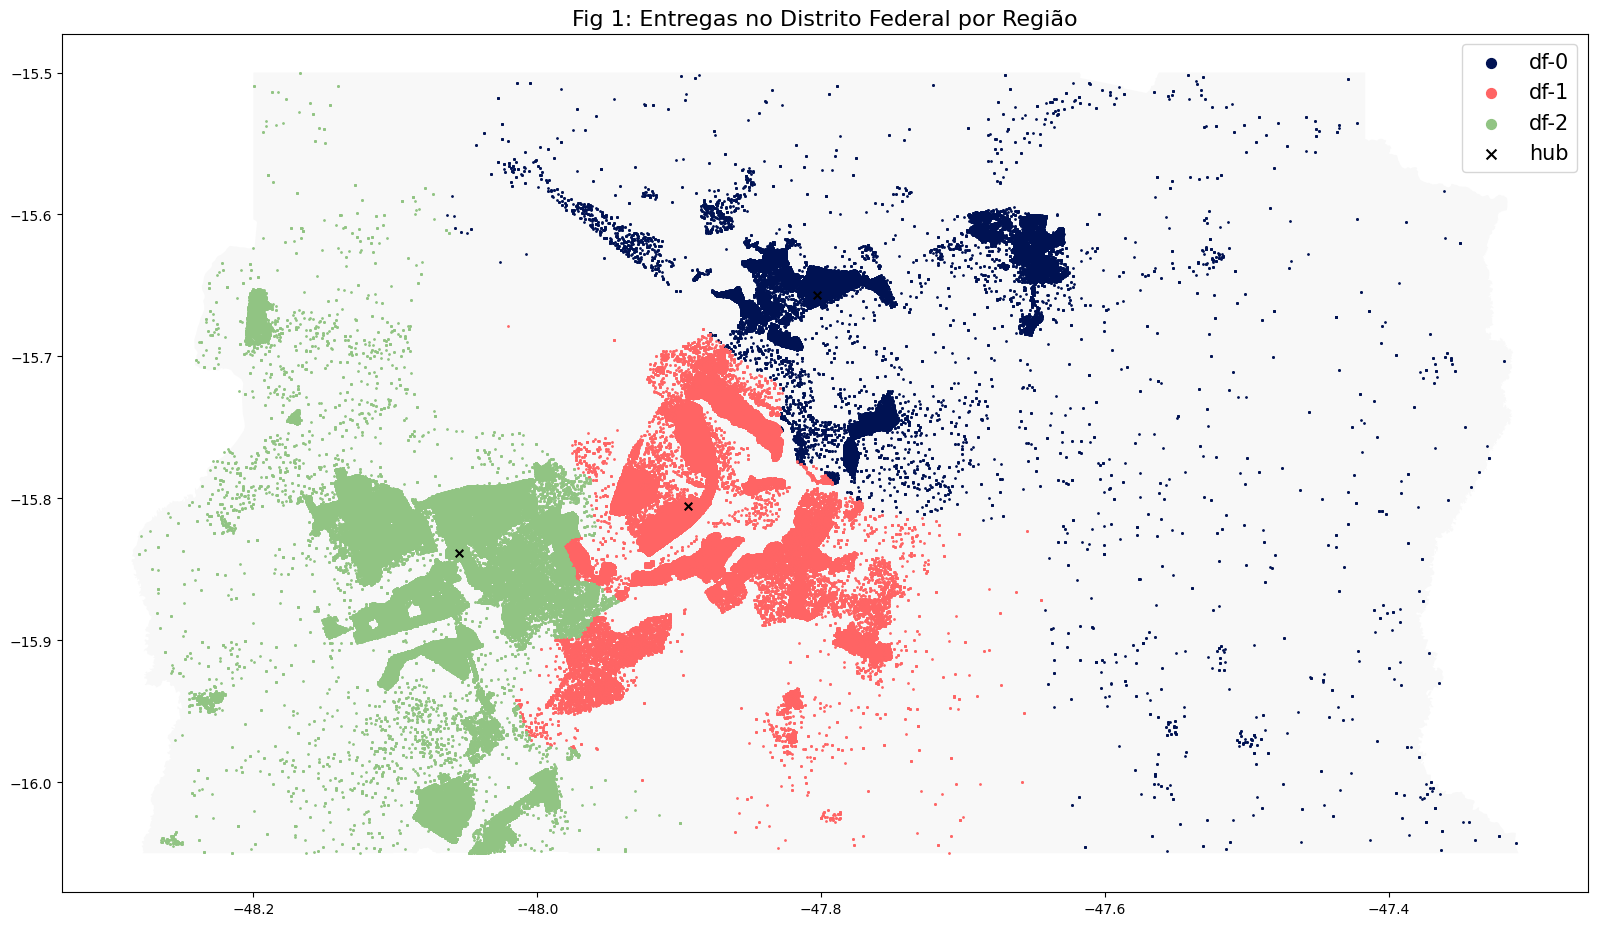

In [62]:
# cria o plot vazio
fig, ax = plt.subplots(figsize = (50/2.54, 50/2.54))

# plot mapa do distrito federal
mapa.plot(ax=ax, alpha=0.4, color="#EEEEEE")

# plot das entregas
geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color="#001253", label="df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color="#FF6464", label="df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color="#91C483", label="df-2")

# plot dos hubs
geo_hub_df.plot(ax=ax, markersize=30, marker="x", color="black", label="hub")

# plot da legenda
plt.title("Fig 1: Entregas no Distrito Federal por Região", fontdict={"fontsize": 16})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

 - **Insights**:

1. A distância média percorrida para a realização de uma entrega considerando os três hubs é de 7.1 km, e a distância mediana é de 5.53km.
  * A distância média percorrida em entregas que partem do **df-0** é de 9km e a distância mediana de 5.94km. A distância máxima percorrida é de 67.92km.
  * A distância média percorrida em entregas que partem do **df-1** é de 5.95km e a distância mediana de 5.07km. A distância máxima percorrida é de 33.59km.
  * A distância média percorrida em entregas que partem do **df-2** é de 7.90km e a distância mediana de 6.44km. A distância máxima percorrida é de 39.68km.

2. As entregas realizadas no hub **df-1** encontram-se mais concentradas e apresentam a menor distância máxima, enquanto as entregas realizadas no hub **df-0** mostram através da diferença entre a média e a mediana que, apesar de grande parte das entregas estarem localizadas a uma distância de 15km (75% dos dados), esse hub é o que apresenta as maiores distâncias na entrega.

3. Os hubs **df-0** e **df-2** entregam pacotes mais afastados de suas hubs do que df-1, o que pode ocasionar maior tempo e custo de entrega.

4. As hubs estão localizadas perto de onde há mais entregas.

5. As entregas de **df-0** são as mais descentralizadas por fazer parte de uma Zona Rural da cidade de Brasília , enquanto, em df-1, são mais centralizadas.

### **5.2. Gráfico de entregas por região**

 - **Agregação**:

In [63]:
# Normalize retorna os valores relativos (proporcionais)
data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()
data.rename(columns={0: "region_percent"}, inplace=True)
data.head()

,region,vehicle_capacity,region_percent
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


 - **Visualização**:

<ipython-input-64-7eb2de248a43>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=data, x="region", y="region_percent", ci=None, palette="pastel")


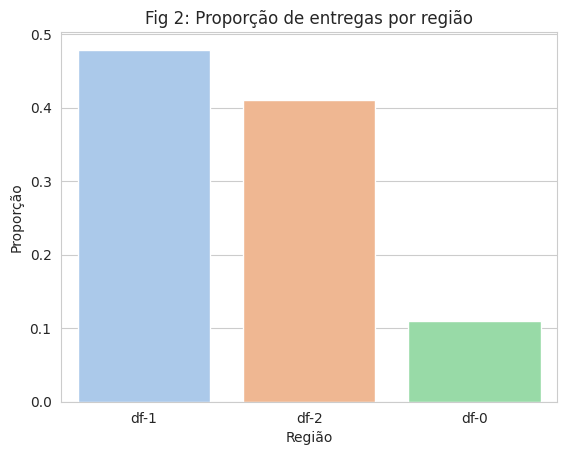

In [64]:
import seaborn as sns

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=data, x="region", y="region_percent", ci=None, palette="pastel")
  grafico.set(title='Fig 2: Proporção de entregas por região', xlabel='Região', ylabel='Proporção');

In [65]:
df_grouped_city = deliveries_df.groupby(['delivery_city', 'region'])['name'].count().to_frame().reset_index().rename(columns={'name': 'n_deliveries'})
# df_grouped_city = deliveries_df.groupby(['delivery_city'])['distance'].mean().to_frame().reset_index()

In [66]:
df_grouped_city.head()

,delivery_city,region,n_deliveries
0,Agrovila Café Sem Troco,df-0,2
1,Agrovila Café Sem Troco,df-1,17
2,Agrovila Café Sem Troco,df-2,18
3,Arniqueiras,df-0,1050
4,Arniqueiras,df-1,3915


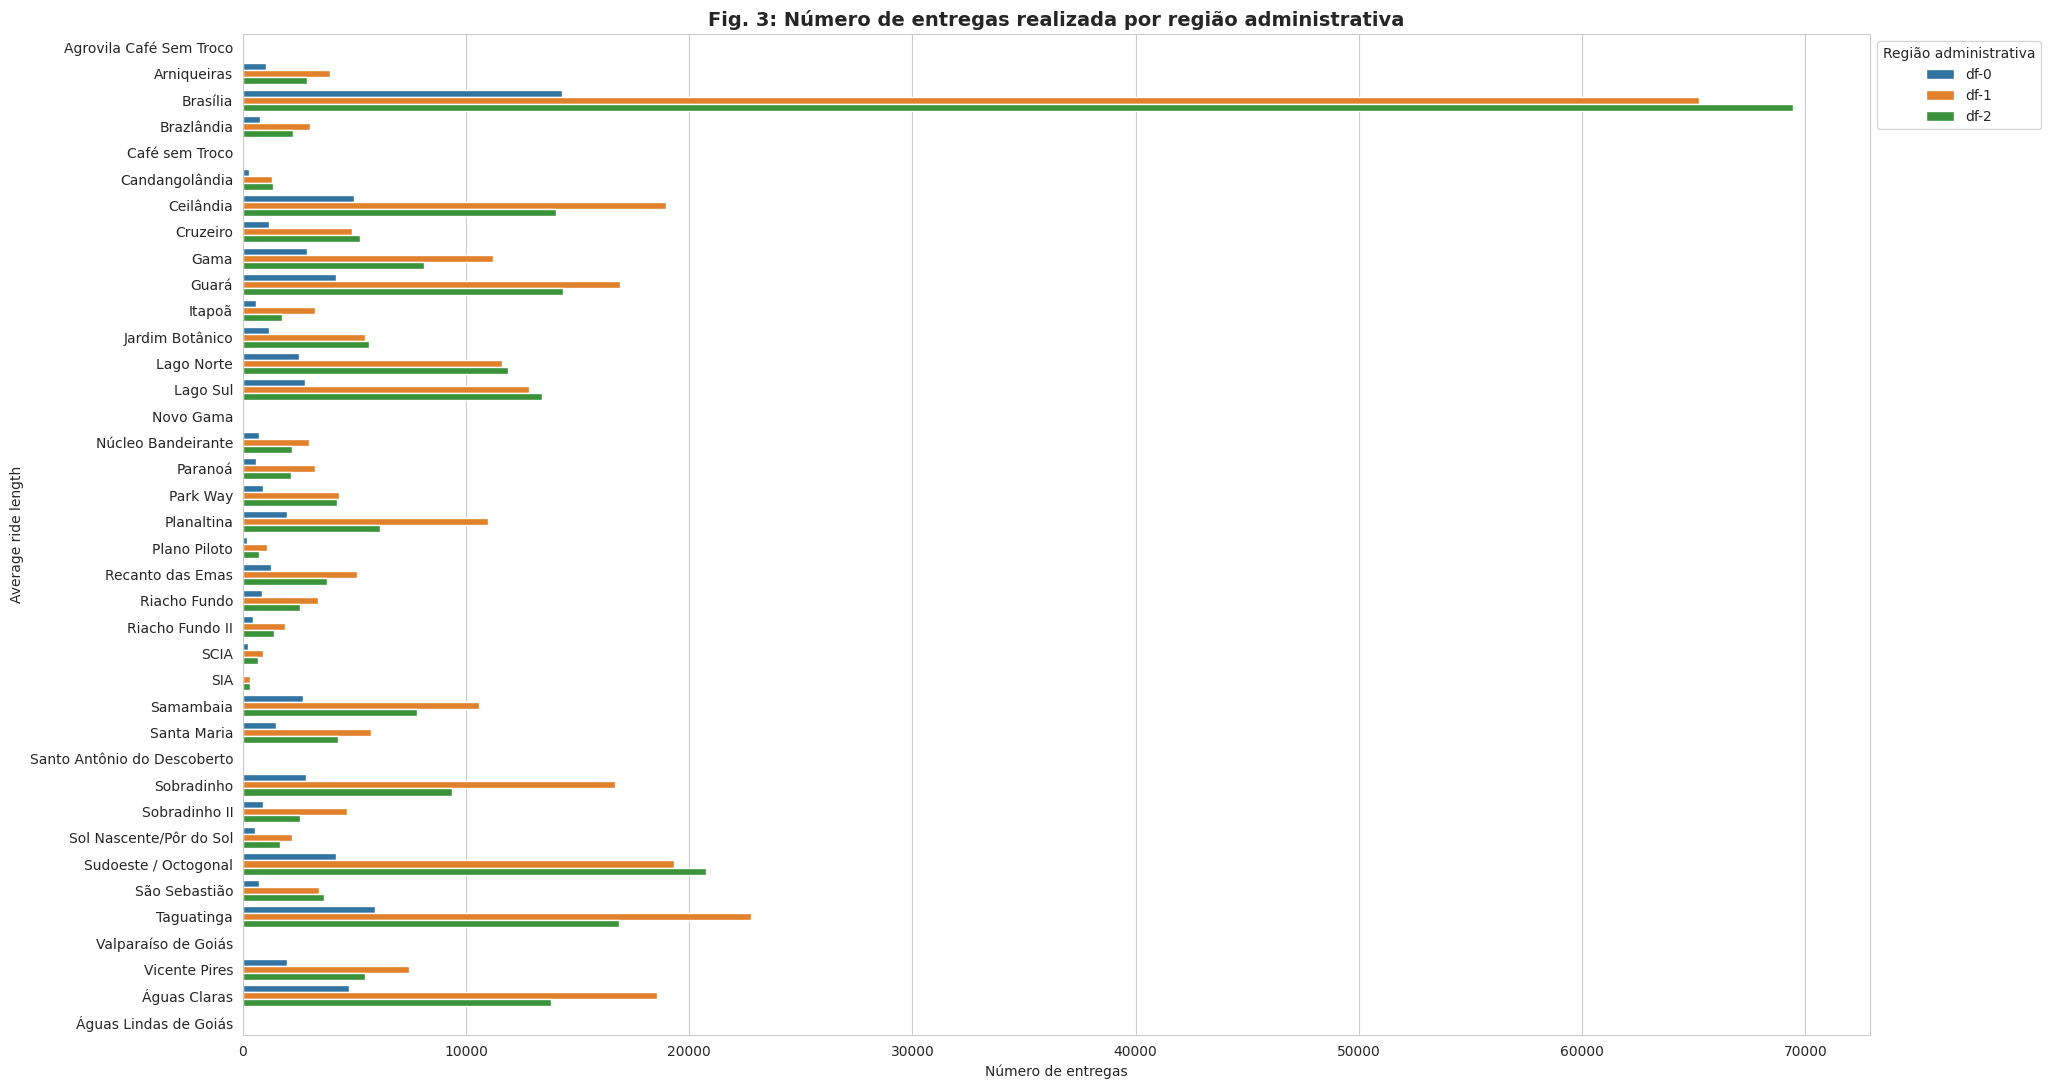

In [67]:
with sns.axes_style('whitegrid'):
  g = sns.barplot(data=df_grouped_city,
                  x='n_deliveries',
                  y='delivery_city',
                  hue='region',
                  capsize=.15,
                  errwidth=0.2)
  g.set_title("Fig. 3: Número de entregas realizada por região administrativa", fontsize=14, fontweight="bold");
  g.set(xlabel="Número de entregas", ylabel="Average ride length")
  g.figure.set_size_inches(21,13)
  plt.legend(title="Região administrativa", loc = 2, bbox_to_anchor = (1,1))


 - **Insights**:

1. Como foi observado através do mapa de entregas em conjunto com o sumário de dados estatísticos, o hub df-0 possui rotas com maior distância e o df-1 possui a maior quantidade de entregas na região, enquanto df-0 a menor.

2. Há uma disparidade muito grande na proporção de entregas entre df-0 e as demais regiões.

3. Dessa forma, a abrangência de cada hub referente às áreas de entrega que eles realizam poderia ser reavaliada, distribuindo algumas das entregas realizadas pelo df-1 para o df-2 e do df-0 para o df-1, por exemplo.